Convolutional neural networks

While you can use deep learning models for any kind of machine learning, they're particularly useful for dealing with data that consists of large arrays of numeric values - such as images. [Her tür makine öğrenimi için derin öğrenme modellerini kullanabilirsiniz, ancak bunlar özellikle görüntüler gibi büyük sayısal değer dizilerinden oluşan verilerle uğraşmak için kullanışlıdır.] Machine learning models that work with images are the foundation for an area artificial intelligence called computer vision, and deep learning techniques have been responsible for driving amazing advances in this area over recent years. [Görüntülerle çalışan makine öğrenimi modelleri, bilgisayarla görme adı verilen yapay zeka alanının temelidir ve son yıllarda bu alanda inanılmaz ilerlemeler sağlamaktan derin öğrenme teknikleri sorumludur.]

At the heart of deep learning's success in this area is a kind of model called a convolutional neural network, or CNN. [Derin öğrenmenin bu alandaki başarısının kalbinde, evrişimli sinir ağı veya CNN adı verilen bir tür model vardır.] A CNN typically works by extracting features from images, and then feeding those features into a fully connected neural network to generate a prediction. [Bir CNN, tipik olarak, görüntülerden özellikleri çıkararak ve ardından bir tahmin oluşturmak için bu özellikleri tamamen bağlı bir sinir ağına besleyerek çalışır.] The feature extraction layers in the network have the effect of reducing the number of features from the potentially huge array of individual pixel values to a smaller feature set that supports label prediction. [Ağdaki özellik çıkarma katmanları, potansiyel olarak çok büyük bireysel piksel değerleri dizisinden özellik sayısını, etiket tahminini destekleyen daha küçük bir özellik kümesine düşürme etkisine sahiptir.]

### Layers in a CNN 
CNNs consist of multiple layers, each performing a specific task in extracting features or predicting labels. [CNN'ler, her biri özellikleri çıkarmada veya etiketleri tahmin etmede belirli bir görevi yerine getiren birden çok katmandan oluşur.]

### Convolution layers
One of the principal layer types is a convolutional layer that extracts important features in images. [Temel katman türlerinden biri, görüntülerdeki önemli özellikleri çıkaran evrişimli bir katmandır.] A convolutional layer works by applying a filter to images. [Evrişimli bir katman, görüntülere bir filtre uygulayarak çalışır.] The filter is defined by a kernel that consists of a matrix of weight values. [Filtre, ağırlık değerleri matrisinden oluşan bir çekirdek tarafından tanımlanır.]
For example, a 3x3 filter might be defined like this: [Örneğin, bir 3x3 filtre şu şekilde tanımlanabilir:]

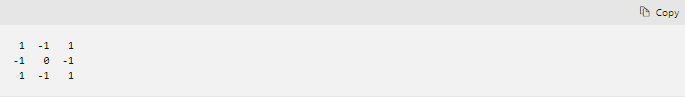

An image is also just a matrix of pixel values. [Bir görüntü aynı zamanda sadece bir piksel değerleri matrisidir.] To apply the filter, you "overlay" it on an image and calculate a weighted sum of the corresponding image pixel values under the filter kernel. [Filtreyi uygulamak için, onu bir görüntünün üzerine 'bindirirsiniz' ve filtre çekirdeği altında karşılık gelen görüntü piksel değerlerinin ağırlıklı toplamını hesaplarsınız.] The result is then assigned to the center cell of an equivalent 3x3 patch in a new matrix of values that is the same size as the image. [Sonuç daha sonra görüntü ile aynı boyutta yeni bir değerler matrisinde eşdeğer bir 3x3 yamanın merkez hücresine atanır.] For example, suppose a 6 x 6 image has the following pixel values: [Örneğin, 6 x 6'lık bir görüntünün aşağıdaki piksel değerlerine sahip olduğunu varsayalım:]

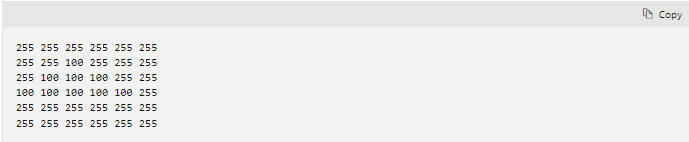

Applying the filter to the top-left 3x3 patch of the image would work like this:

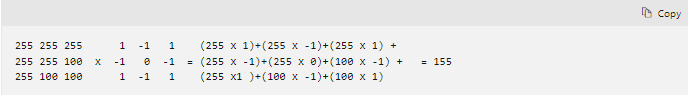

The result is assigned to the corresponding pixel value in the new matrix like this:

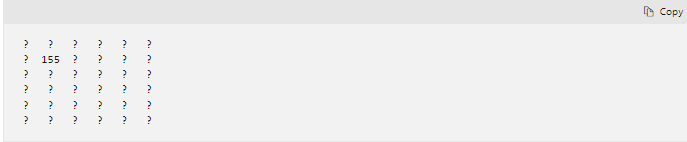

Now the filter is moved along (convolved), typically using a step size of 1 (so moving along one pixel to the right), and the value for the next pixel is calculated

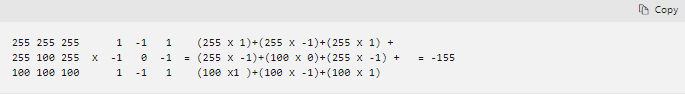

So now we can fill in the next value of the new matrix.

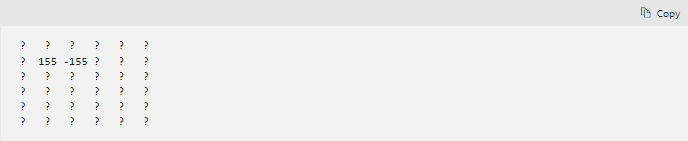

The process repeats until we've applied the filter across all of the 3x3 patches of the image to produce a new matrix of values like this:

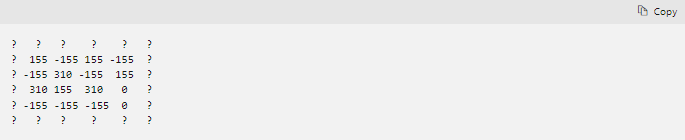

Because of the size of the filter kernel, we can't calculate values for the pixels at the edge; so we typically just apply a padding value (often 0):

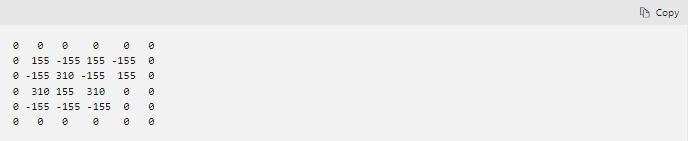

The output of the convolution is typically passed to an activation function, which is often a Rectified Linear Unit (ReLU) function that ensures negative values are set to 0:

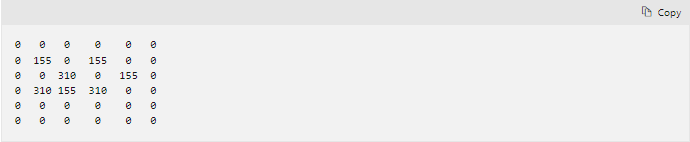

The resulting matrix is a feature map of feature values that can be used to train a machine learning model.

Note: The values in the feature map can be greater than the maximum value for a pixel (255), so if you wanted to visualize the feature map as an image you would need to normalize the feature values between 0 and 255.

The convolution process is shown in the animation below.

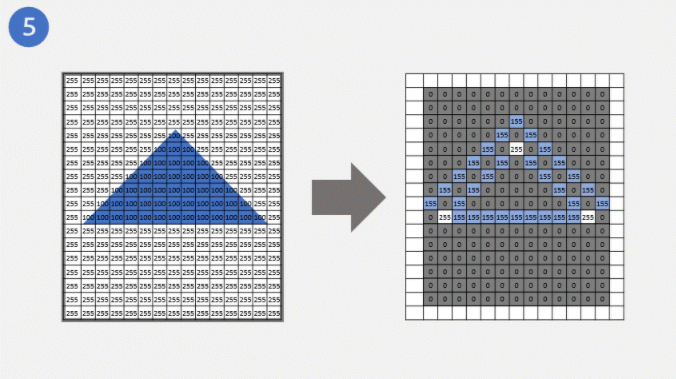

1. An image is passed to the convolutional layer. [Konvolüsyon katmanına bir görüntü aktarılır.] In this case, the image is a simple geometric shape. [Bu durumda, görüntü basit bir geometrik şekildir.]

2. The image is composed of an array of pixels with values between 0 and 255 (for color images, this is usually a 3-dimensional array with values for red, green, and blue channels). [Görüntü, 0 ile 255 arasında değerlere sahip bir piksel dizisinden oluşur (renkli görüntüler için bu genellikle kırmızı, yeşil ve mavi kanalların değerlerine sahip 3 boyutlu bir dizidir).]

3. A filter kernel is generally initialized with random weights (in this example, we've chosen values to highlight the effect that a filter might have on pixel values; but in a real CNN, the initial weights would typically be generated from a random Gaussian distribution). [Bir filtre çekirdeği genellikle rastgele ağırlıklarla başlatılır (bu örnekte, bir filtrenin piksel değerleri üzerindeki etkisini vurgulamak için değerler seçtik; ancak gerçek bir CNN'de, ilk ağırlıklar tipik olarak rastgele bir Gauss dağılımından oluşturulur ).] This filter will be used to extract a feature map from the image data. [Bu filtre, görüntü verilerinden bir özellik haritası çıkarmak için kullanılacaktır.]

4. The filter is convolved across the image, calculating feature values by applying a sum of the weights multiplied by their corresponding pixel values in each position. [Filtre görüntü boyunca kıvrılır ve her bir konumda karşılık gelen piksel değerleriyle çarpılan ağırlıkların bir toplamını uygulayarak özellik değerlerini hesaplar.] A Rectified Linear Unit (ReLU) activation function is applied to ensure negative values are set to 0. [Negatif değerlerin 0'a ayarlanmasını sağlamak için bir Rektifiye Doğrusal Birim (ReLU) etkinleştirme işlevi uygulanır.]

5. After convolution, the feature map contains the extracted feature values, which often emphasize key visual attributes of the image. [Evrişimden sonra, özellik haritası, genellikle görüntünün temel görsel niteliklerini vurgulayan, çıkarılan özellik değerlerini içerir.] In this case, the feature map highlights the edges and corners of the triangle in the image. [Bu durumda, özellik haritası görüntüdeki üçgenin kenarlarını ve köşelerini vurgular.]

Typically, a convolutional layer applies multiple filter kernels. [Tipik olarak, bir evrişim katmanı, birden çok filtre çekirdeği uygular.] Each filter produces a different feature map, and all of the feature maps are passed onto the next layer of the network. [Her filtre farklı bir özellik haritası üretir ve tüm özellik haritaları ağın bir sonraki katmanına iletilir.]

### Pooling layers

After extracting feature values from images, pooling (or downsampling) layers are used to reduce the number of feature values while retaining the key differentiating features that have been extracted. [Görüntülerden öznitelik değerleri çıkarıldıktan sonra, öznitelik değerlerinin sayısını azaltmak için havuzlama (veya altörnekleme) katmanları kullanılırken, ayıklanmış olan temel ayırt edici öznitelikler korunur.]

One of the most common kinds of pooling is max pooling in which a filter is applied to the image, and only the maximum pixel value within the filter area is retained. [En yaygın havuzlama türlerinden biri, görüntüye bir filtrenin uygulandığı ve yalnızca filtre alanındaki maksimum piksel değerinin korunduğu maksimum havuzlamadır.] So for example, applying a 2x2 pooling kernel to the following patch of an image would produce the result 155. [Örneğin, bir görüntünün sonraki yamasına 2x2 havuzlama çekirdeği uygulamak, 155 sonucunu verir.]

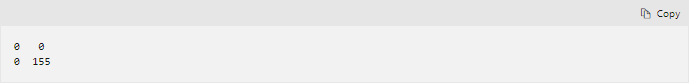

Note that the effect of the 2x2 pooling filter is to reduce the number of values from 4 to 1.

As with convolutional layers, pooling layers work by applying the filter across the whole feature map. The animation below shows an example of max pooling for an image map.

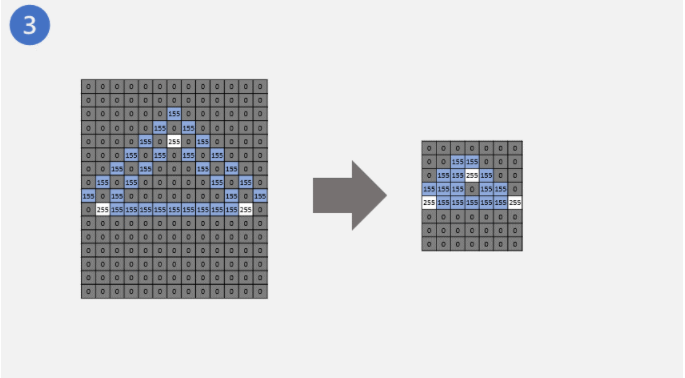

1. The feature map extracted by a filter in a convolutional layer contains an array of feature values. [Bir evrişim katmanındaki bir filtre tarafından çıkarılan özellik haritası, bir dizi özellik değeri içerir.]

2. A pooling kernel is used to reduce the number of feature values. [Özellik değerlerinin sayısını azaltmak için bir havuzlama çekirdeği kullanılır.] In this case, the kernel size is 2x2, so it will produce an array with quarter the number of feature values. [Bu durumda, çekirdek boyutu 2x2'dir, bu nedenle özellik değerlerinin dörtte biri kadar bir dizi üretecektir.]

3. The pooling kernel is convolved across the feature map, retaining only the highest pixel value in each position. [Havuzlama çekirdeği, her bir konumda yalnızca en yüksek piksel değerini koruyarak özellik haritası boyunca kıvrılır.]

### Dropping layers

One of the most difficult challenges in a CNN is the avoidance of overfitting, where the resulting model performs well with the training data but doesn't generalize well to new data on which it wasn't trained. [Bir CNN'deki en zor zorluklardan biri, ortaya çıkan modelin eğitim verileriyle iyi performans gösterdiği ancak eğitim almadığı yeni veriler için iyi genelleme yapmadığı fazla uydurmadan kaçınmaktır.] One technique you can use to mitigate overfitting is to include layers in which the training process randomly eliminates (or "drops") feature maps. [Fazla uydurmayı azaltmak için kullanabileceğiniz bir teknik, eğitim sürecinin özellik haritalarını rastgele ortadan kaldırdığı (veya 'düşürdüğü') katmanları dahil etmektir.] This may seem counterintuitive, but it's an effective way to ensure that the model doesn't learn to be over-dependent on the training images. [Bu mantıksız görünebilir, ancak modelin eğitim görüntülerine aşırı bağımlı olmayı öğrenmemesini sağlamanın etkili bir yoludur.]

Other techniques you can use to mitigate overfitting include randomly flipping, mirroring, or skewing the training images to generate data that varies between training epochs. [Fazla takmayı azaltmak için kullanabileceğiniz diğer teknikler arasında eğitim dönemleri arasında değişen veriler oluşturmak için eğitim görüntülerini rastgele çevirme, yansıtma veya eğriltme yer alır.]

### Flattening layers
After using convolutional and pooling layers to extract the salient features in the images, the resulting feature maps are multidimensional arrays of pixel values. [Görüntülerdeki göze çarpan özellikleri çıkarmak için evrişim ve havuzlama katmanlarını kullandıktan sonra, ortaya çıkan özellik haritaları çok boyutlu piksel değerleri dizileridir.] A flattening layer is used to flatten the feature maps into a vector of values that can be used as input to a fully connected layer. [Düzleştirme katmanı, özellik eşlemelerini tamamen bağlı bir katmana girdi olarak kullanılabilecek bir değerler vektörüne düzleştirmek için kullanılır.]

### Fully connected layers
Usually, a CNN ends with a fully connected network in which the feature values are passed into an input layer, through one or more hidden layers, and generate predicted values in an output layer. [Genellikle, bir CNN, özellik değerlerinin bir veya daha fazla gizli katman aracılığıyla bir girdi katmanına geçirildiği ve bir çıktı katmanında tahmin edilen değerler ürettiği tamamen bağlı bir ağ ile sona erer.]

A basic CNN architecture might look similar to this: [Temel bir CNN mimarisi şuna benzer görünebilir:]

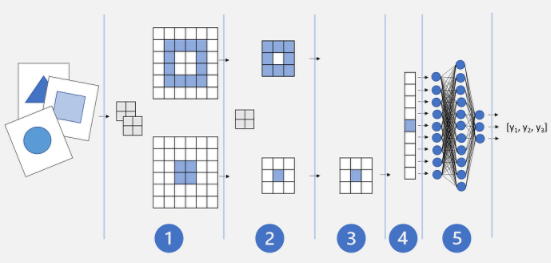

1. Images are fed into a convolutional layer. [Görüntüler bir evrişim katmanına beslenir.] In this case, there are two filters, so each image produces two feature maps. [Bu durumda iki filtre vardır, bu nedenle her görüntü iki özellik haritası üretir.]

2. The feature maps are passed to a pooling layer, where a 2x2 pooling kernel reduces the size of the feature maps. [Özellik haritaları, 2x2 havuzlama çekirdeğinin özellik haritalarının boyutunu küçülttüğü bir havuzlama katmanına geçirilir.]

3. A dropping layer randomly drops some of the feature maps to help prevent overfitting. [Düşen bir katman, fazla takmayı önlemeye yardımcı olmak için bazı özellik haritalarını rasgele bırakır.]

4. A flattening layer takes the remaining feature map arrays and flattens them into a vector. [Düzleştirme katmanı, kalan özellik haritası dizilerini alır ve bunları bir vektöre düzleştirir.]

5. The vector elements are fed into a fully connected network, which generates the predictions. [Vektör elemanları, tahminleri üreten tam bağlantılı bir ağa beslenir.] In this case, the network is a classification model that predicts probabilities for three possible image classes (triangle, square, and circle). [Bu durumda ağ, üç olası görüntü sınıfı (üçgen, kare ve daire) için olasılıkları tahmin eden bir sınıflandırma modelidir.]

### Training a CNN model

As with any deep neural network, a CNN is trained by passing batches of training data through it over multiple epochs, adjusting the weights and bias values based on the loss calculated for each epoch. [Herhangi bir derin sinir ağında olduğu gibi, bir CNN, her bir dönem için hesaplanan kayba dayalı olarak ağırlıkları ve önyargı değerlerini ayarlayarak, birden fazla dönem boyunca eğitim verilerinin toplu olarak geçirilmesiyle eğitilir.] In the case of a CNN, backpropagation of adjusted weights includes filter kernel weights used in convolutional layers as well as the weights used in fully connected layers. [Bir CNN durumunda, ayarlanmış ağırlıkların geri yayılımı, evrişimli katmanlarda kullanılan filtre çekirdeği ağırlıklarının yanı sıra tam bağlantılı katmanlarda kullanılan ağırlıkları içerir.]